Find dataset here: https://github.com/OmdenaAI/Berlin-Chapter-Challenge-Waste-Management/tree/main/src/data/3-clean%20data/Datasets_for_modeling/Processed_Datasets

In [141]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [142]:
dataframe=pd.read_csv("/content/Processed_DatasetsAmount-of Waste-Generated-By-State 32121-0003.csv")

In [143]:
dataframe.head()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           1046 non-null   int64  
 1   States                                         1046 non-null   object 
 2   Types of Waste                                 1046 non-null   object 
 3   Total Household Waste Generated (Tons)         1046 non-null   float64
 4   Household Waste Generated per Inhabitant (kg)  1046 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 41.0+ KB


apply now encoder

In [144]:
encoder=LabelEncoder()

In [145]:
#dataframe['States']=encoder.fit_transform(dataframe['States'])

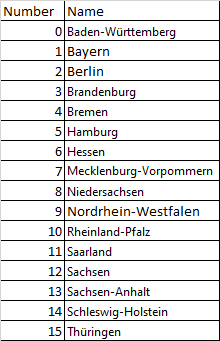

In [146]:
#dataframe['Types of Waste']=encoder.fit_transform(dataframe['Types of Waste'])

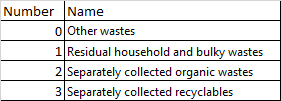

In [147]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           1046 non-null   int64  
 1   States                                         1046 non-null   object 
 2   Types of Waste                                 1046 non-null   object 
 3   Total Household Waste Generated (Tons)         1046 non-null   float64
 4   Household Waste Generated per Inhabitant (kg)  1046 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 41.0+ KB


Dealing with outliers in Total Household Waste Generated (Tons) only because no outliers in 'Household Waste Generated per Inhabitant (Kg)



<Axes: xlabel='Total Household Waste Generated (Tons)'>

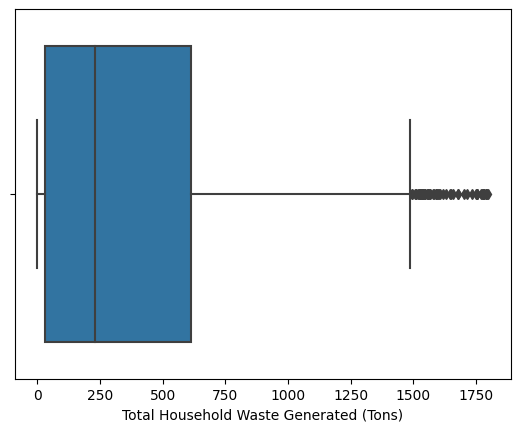

In [148]:
sns.boxplot(data=dataframe,x= 'Total Household Waste Generated (Tons)')


<Axes: xlabel='Household Waste Generated per Inhabitant (kg)'>

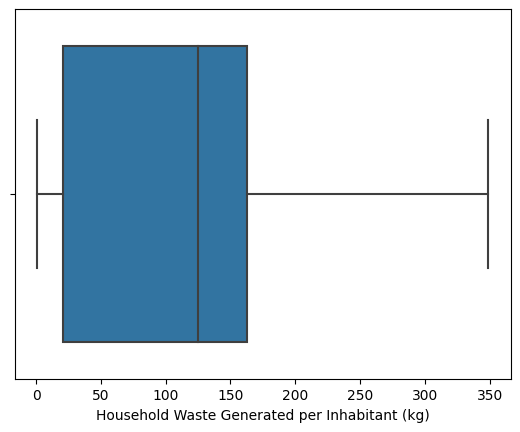

In [149]:
sns.boxplot(data=dataframe,x='Household Waste Generated per Inhabitant (kg)')
# no need for outlier treatment.

In [150]:
Q3=dataframe['Total Household Waste Generated (Tons)'].quantile(0.75)
Q1=dataframe['Total Household Waste Generated (Tons)'].quantile(0.25)
iqr=Q3-Q1
Upper_limit=Q3+(1.5*iqr)
Lower_limit=Q1-(1.5*iqr)

dataframe['Total Household Waste Generated (Tons)']=dataframe['Total Household Waste Generated (Tons)'].apply(lambda x: Upper_limit if x > Upper_limit else Lower_limit if x < Lower_limit else x)

<Axes: xlabel='Total Household Waste Generated (Tons)'>

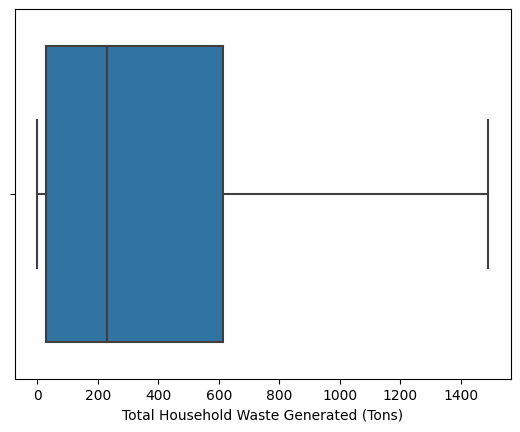

In [151]:
sns.boxplot(data=dataframe,x= 'Total Household Waste Generated (Tons)')

In [152]:
dataframe.head()

,Year,States,Types of Waste,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
0,2004,Baden-WÃ¼rttemberg,Residual household and bulky wastes,1490.275,150.0
1,2004,Baden-WÃ¼rttemberg,Separately collected organic wastes,1220.500,114.0
2,2004,Baden-WÃ¼rttemberg,Separately collected recyclables,1490.275,154.0
3,2004,Baden-WÃ¼rttemberg,Other wastes,9.400,1.0
4,2004,Bayern,Separately collected organic wastes,1490.275,135.0


In [153]:
X=dataframe.drop(labels=['Year','States','Types of Waste'],axis=1)

now normalizing the X

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler=StandardScaler()

In [156]:
X=scaler.fit_transform(X)

In [157]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i , init='k-means++', random_state=42, max_iter=2000 )
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

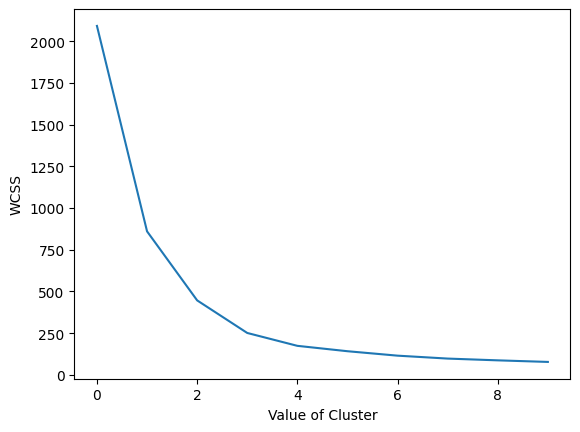

In [158]:
#plotting elbow graph
import matplotlib.pyplot as plt
plt.plot(WCSS)
plt.xlabel('Value of Cluster')
plt.ylabel('WCSS')
plt.show()

if I dont use Standard Scaler then number of classification suggested is 2 and when standardscaler is applied then suggested number of classes is 4.

In [163]:
#Taking number of class as 4
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42,)

In [164]:
#returning Label for each data point so what we can see that which value is in which cluster
Y= kmeans.fit_predict(X)
print(Y)

[2 2 2 ... 4 4 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [165]:
cluster=pd.DataFrame(Y,columns=['Cluster_number'])
clustered_dataset=pd.concat([dataframe,cluster],axis=1)
clustered_dataset.head()

,Year,States,Types of Waste,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg),Cluster_number
0,2004,Baden-WÃ¼rttemberg,Residual household and bulky wastes,1490.275,150.0,2
1,2004,Baden-WÃ¼rttemberg,Separately collected organic wastes,1220.500,114.0,2
2,2004,Baden-WÃ¼rttemberg,Separately collected recyclables,1490.275,154.0,2
3,2004,Baden-WÃ¼rttemberg,Other wastes,9.400,1.0,1
4,2004,Bayern,Separately collected organic wastes,1490.275,135.0,2


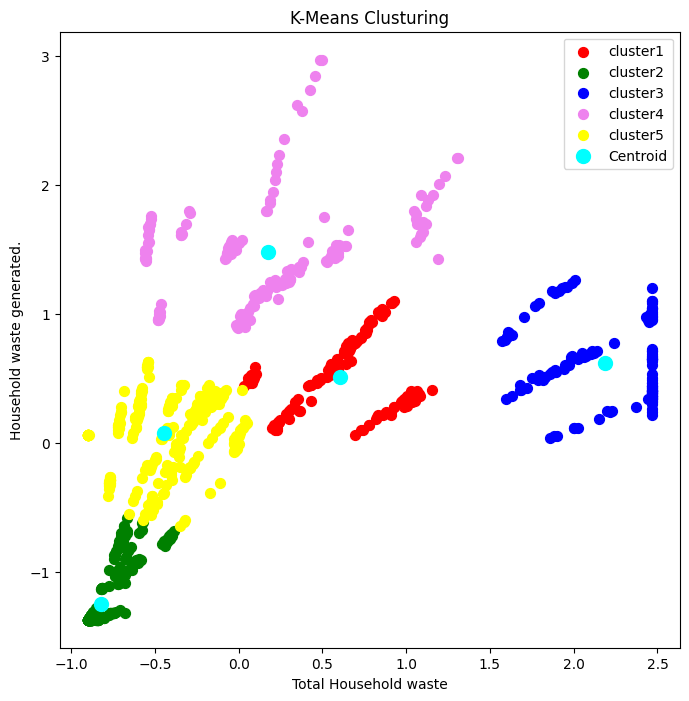

In [166]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='red',label='cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='green',label='cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label='cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='yellow',label='cluster5')
plt.xlabel('Total Household waste')
plt.ylabel('Household waste generated.')
plt.title('K-Means Clusturing')
# Plotting Centroid Value
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroid')
plt.legend()
plt.show()

In [168]:
clustered_dataset.to_excel('Amount-of Waste-Generated-By-State 32121-0003.xlsx')